# becquerel fitting example

In [1]:
import becquerel as bq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'

np.random.seed(0)

# read example spectrum into Spectrum object
spec1 = bq.Spectrum.from_file('../tests/samples/digibase_5min_30_1.spe')

SpeFile: Reading file ../tests/samples/digibase_5min_30_1.spe


/Users/jvavrek/becquerel/becquerel/parsers/spectrum_file.py:136: SpectrumFileParsingWarning: Spectrum will be initated without an energy calibration;invalid calibration, energies not monotonically increasing.
  SpectrumFileParsingWarning)


//anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


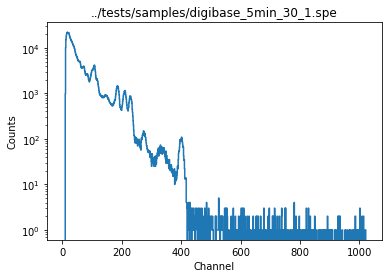

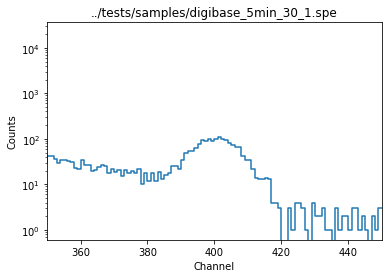

In [2]:
# plot the entire spectrum and the ROI we want to fit

spec1.plot(yscale='log')
plt.show()

spec1.plot(yscale='log', xlim=(350, 450))
plt.show()

In [3]:
# looks like a gauss peak shape plus an exponential background model will be appropriate
model = (bq.fitting.GaussModel(prefix='gauss0_') + bq.fitting.ExpModel(prefix='exp_'))

//anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# pass our model and data to a fitter
fitter = bq.Fitter(
    model,
    x=spec1.channels,
    y=spec1.counts_vals,
    y_unc=spec1.counts_uncs,
    roi=(350, 450)
)

# perform the fit
fitter.fit()

/Users/jvavrek/becquerel/becquerel/core/spectrum.py:386: DeprecationWarning: channels is deprecated terminology and will be removed in a future release. Use bin_indices instead.
  DeprecationWarning)


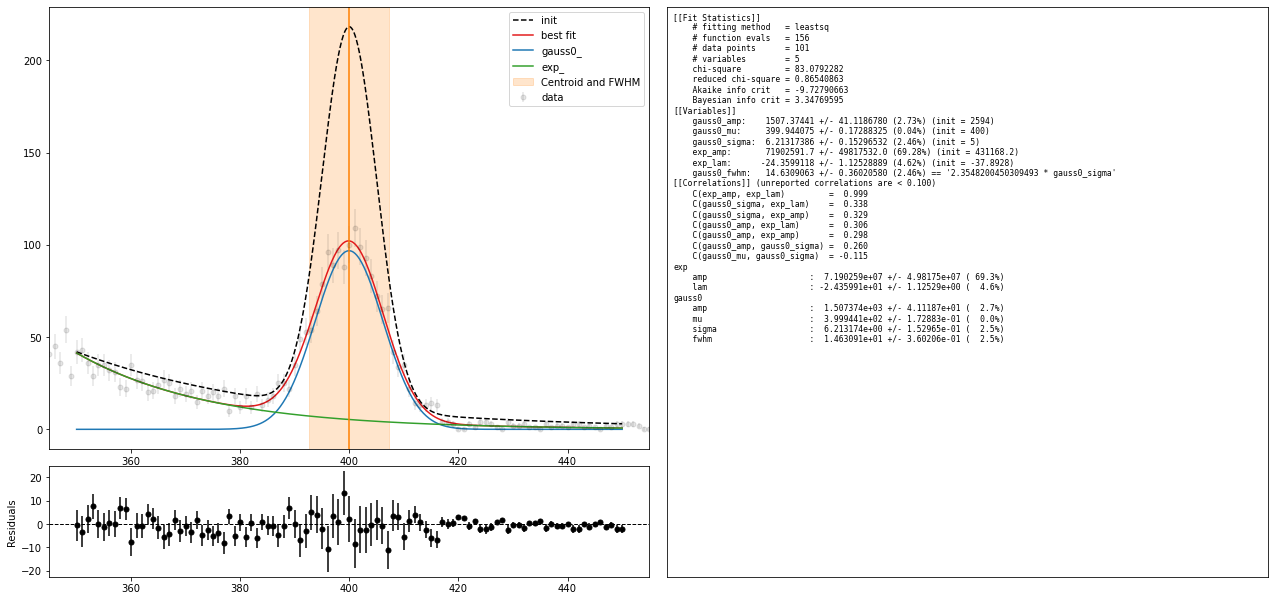

In [5]:
# custom_plot() lets us see the fit result and diagnostics simultaneously
fitter.custom_plot()
plt.show()

In [6]:
# Alternatively, we can pass a list of string model names to the Fitter.
# At the same time, let's try a linear background model instead of the exponential.
fitter = bq.Fitter(
    ['gauss', 'line'],
    y=spec1.counts_vals,
    x=spec1.channels,
    y_unc=spec1.counts_uncs,
    roi=(350, 450)
)
fitter.fit()

//anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/jvavrek/becquerel/becquerel/core/spectrum.py:386: DeprecationWarning: channels is deprecated terminology and will be removed in a future release. Use bin_indices instead.
  DeprecationWarning)


//anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/jvavrek/becquerel/becquerel/core/fitting.py:696: RuntimeWarning: divide by zero encountered in true_divide
  y_plot = y_res / self.y_roi
/Users/jvavrek/becquerel/becquerel/core/fitting.py:697: RuntimeWarning: divide by zero encountered in true_divide
  yerr_plot = self.y_unc_roi / self.y_roi
//anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3411: RuntimeWarning: invalid value encountered in double_scalars
  low = [v if lo else v - e for v, e, lo in zip(data, a, lolims)]
//anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3412: RuntimeWarning: invalid value encountered in double_scalars
  high = [v if up

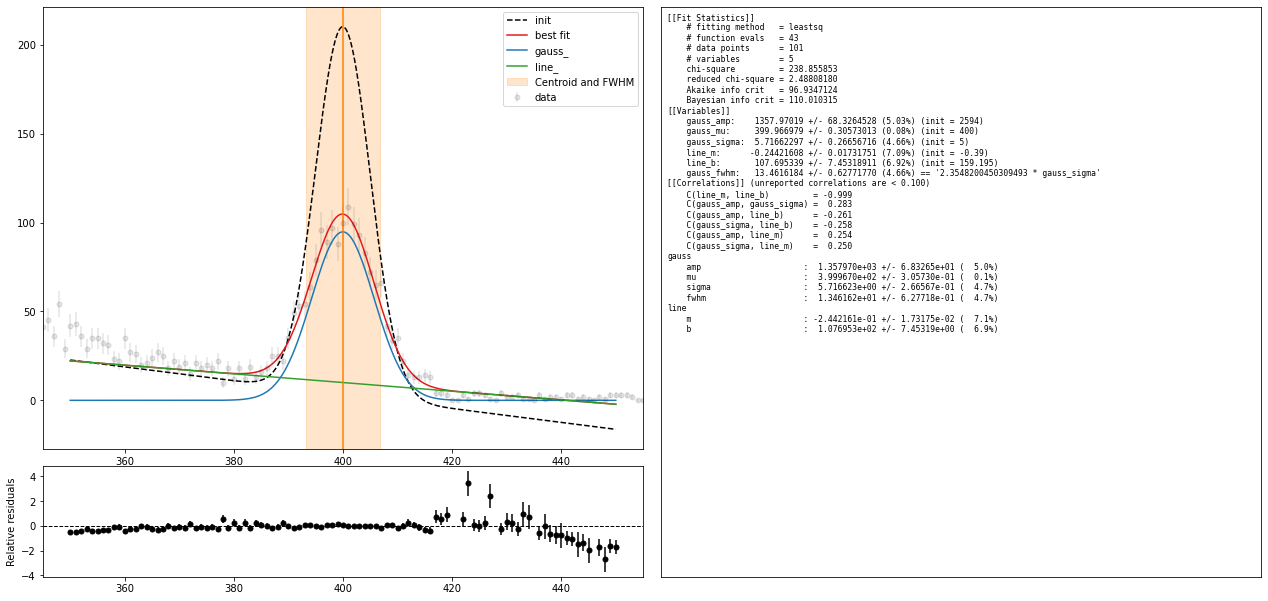

In [11]:
# we can also specify that we want to plot normalized instead of absolute residuals
fitter.custom_plot(norm_residuals=True)
plt.show()

In [8]:
# the linear background model performs much worse on the high-E side of the peak

//anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
